Problem 4

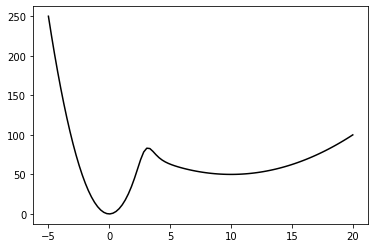

alpha = 0.01, theta = -5
=> theta after 100 iteration : 0
alpha = 0.01, theta = -4
=> theta after 100 iteration : 0
alpha = 0.01, theta = -3
=> theta after 100 iteration : 0
alpha = 0.01, theta = -2
=> theta after 100 iteration : 0
alpha = 0.01, theta = -1
=> theta after 100 iteration : 0
alpha = 0.01, theta = 0
=> theta after 100 iteration : 0
alpha = 0.01, theta = 1
=> theta after 100 iteration : 0
alpha = 0.01, theta = 2
=> theta after 100 iteration : 0
alpha = 0.01, theta = 3
=> theta after 100 iteration : 0
alpha = 0.01, theta = 4
=> theta after 100 iteration : 8
alpha = 0.01, theta = 5
=> theta after 100 iteration : 8
alpha = 0.01, theta = 6
=> theta after 100 iteration : 9
alpha = 0.01, theta = 7
=> theta after 100 iteration : 9
alpha = 0.01, theta = 8
=> theta after 100 iteration : 9
alpha = 0.01, theta = 9
=> theta after 100 iteration : 10
alpha = 0.01, theta = 10
=> theta after 100 iteration : 10
alpha = 0.01, theta = 11
=> theta after 100 iteration : 10
alpha = 0.01, theta =

In [12]:
import numpy as np
import matplotlib.pyplot as plt


np.seterr(invalid='ignore', over='ignore')  # suppress warning caused by division by inf

def f(x):
    return 1/(1 + np.exp(3*(x-3))) * 10 * x**2  + 1 / (1 + np.exp(-3*(x-3))) * (0.5*(x-10)**2 + 50)

def fprime(x):
    return 1 / (1 + np.exp((-3)*(x-3))) * (x-10) + 1/(1 + np.exp(3*(x-3))) * 20 * x + (3* np.exp(9))/(np.exp(9-1.5*x) + np.exp(1.5*x))**2 * ((0.5*(x-10)**2 + 50) - 10 * x**2) 

x = np.linspace(-5,20,100)
plt.plot(x,f(x), 'k')
plt.show()

def gd(alpha, theta):

  print("alpha = {}, theta = {}".format(alpha, theta))
  for i in range(0,100):
    theta = theta - alpha * fprime(theta)
  print("=> theta after 100 iteration : {}".format( round(theta) ))

for j in range(0,3):
  alpha = 0.01
  if j == 1:
    alpha = 0.03
  elif j == 2:
    alpha = 4
  for i in range(-5, 21):
    gd(alpha, i)


Problem 5

In [ ]:
import numpy as np

class Convolution1d :
    def __init__(self, filt) :
        self.__filt = filt # k
        self.__r = filt.size # r
        self.T = TransposedConvolution1d(self.__filt)

    def __matmul__(self, vector) :
        r, n = self.__r, vector.size
        
        return np.asarray([ sum([ self.__filt[j]*vector[i+j] for j in range(0,r) ]) for i in range(0,n-r+1) ])  # IMPLEMENT THIS
    
class TransposedConvolution1d :
    '''
    Transpose of 1-dimensional convolution operator used for the 
    transpose-convolution operation A.T@(...)
    '''
    def __init__(self, filt) :
        self.__filt = filt
        self.__r = filt.size

    def __matmul__(self, vector) :
        r = self.__r
        n = vector.size + r - 1

        return np.asarray([ sum([ self.__filt[i-j]*vector[j] for j in range( max(0,i-r+1), min(n-r+1,i+1)) ]) for i in range(0,n) ])  # IMPLEMENT THIS

def huber_loss(x) :
    return np.sum( (1/2)*(x**2)*(np.abs(x)<=1) + (np.sign(x)*x-1/2)*(np.abs(x)>1) )
def huber_grad(x) :
    return x*(np.abs(x)<=1) + np.sign(x)*(np.abs(x)>1)


r, n, lam = 3, 20, 0.1

np.random.seed(0)
k = np.random.randn(r)
b = np.random.randn(n-r+1)
A = Convolution1d(k)
#from scipy.linalg import circulant
#A = circulant(np.concatenate((np.flip(k),np.zeros(n-r))))[r-1:,:]


x = np.zeros(n)
alpha = 0.01
for _ in range(100) :
    x = x - alpha*(A.T@(huber_grad(A@x-b))+lam*x)

print(huber_loss(A@x-b)+0.5*lam*np.linalg.norm(x)**2)




0.4587586843129764
